In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso, LassoCV, LogisticRegression
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pokemon_df = pd.read_csv("../../data/pokemon.csv")

ansur_male = pd.read_csv("../../data/ANSUR_II_MALE.csv")
ansur_female = pd.read_csv("../../data/ANSUR_II_FEMALE.csv")
ansur = pd.concat([ansur_male, ansur_female])

diabetes_df = pd.read_csv('../../data/PimaIndians.csv')

sales_df = pd.read_csv('../../data/grocery_sales.csv')

## Manual feature extraction I
### You want to compare prices for specific products between stores. The features in the pre-loaded dataset sales_df are: storeID, product, quantity and revenue. The quantity and revenue features tell you how many items of a particular product were sold in a store and what the total revenue was. For the purpose of your analysis it's more interesting to know the average price per product.

### Instructions
-    Calculate the product price from the quantity sold and total revenue.
-    Drop the quantity and revenue features from the dataset.

In [2]:
# Calculate the price from the quantity sold and revenue
sales_df['price'] = sales_df['revenue'] / sales_df['quantity']

# Drop the quantity and revenue features
reduced_df = sales_df.drop(['revenue', 'quantity'], axis=1)

print(reduced_df.head())

  storeID  product     price
0       A   Apples  5.135616
1       A  Bananas  3.365105
2       A  Oranges  5.317020
3       B   Apples  5.143417
4       B  Bananas  3.898517


## Manual feature extraction II
### You're working on a variant of the ANSUR dataset, height_df, where a person's height was measured 3 times: height_1, height_2, height_3. Add a feature with the mean height to the dataset, then drop the 3 original features.

### Instructions
-    Add a feature with the mean height to the dataset. Use the .mean() method with axis=1.
-    Drop the 3 original height features from the dataset.

In [3]:
import random

height_df = ansur[['weight_kg', 'stature_m']].copy()

height_df['height_1'] = height_df.stature_m
height_df = height_df.drop('stature_m', axis=1)
height_df['height_2'] = height_df['height_1'] + random.random()/10
height_df['height_3'] = height_df['height_1'] - random.random()/10

In [4]:
# Calculate the mean height
height_df['height'] = height_df[["height_1", "height_2", "height_3"]].mean(axis=1)

# Drop the 3 original height features
reduced_df = height_df.drop(["height_1", "height_2", "height_3"], axis=1)

print(reduced_df.head())

   weight_kg    height
0       81.5  1.805821
1       72.6  1.731821
2       92.9  1.764821
3       79.4  1.684821
4       94.6  1.943821


## Calculating Principal Components

### You'll visually inspect a 4 feature sample of the ANSUR dataset before and after PCA using Seaborn's pairplot(). This will allow you to inspect the pairwise correlations between the features.

### The data has been pre-loaded for you as ansur_df.

### Instructions 1/4
-    Create a Seaborn pairplot to inspect ansur_df.

In [5]:
ansur.columns

ansur_df = ansur[['stature_m', 'buttockheight', 'waistcircumference', 'shouldercircumference']].copy()
ansur_df['Height m'] = ansur_df['stature_m']
ansur_df['Buttock Height'] = ansur_df['buttockheight']
ansur_df['Waist Circumference'] = ansur_df['waistcircumference']
ansur_df['Shoulder Circumference'] = ansur_df['shouldercircumference']
ansur_df = ansur_df.drop(['stature_m', 'buttockheight', 'waistcircumference', 'shouldercircumference'], axis=1)
ansur_df = ansur_df.reset_index(drop=True)

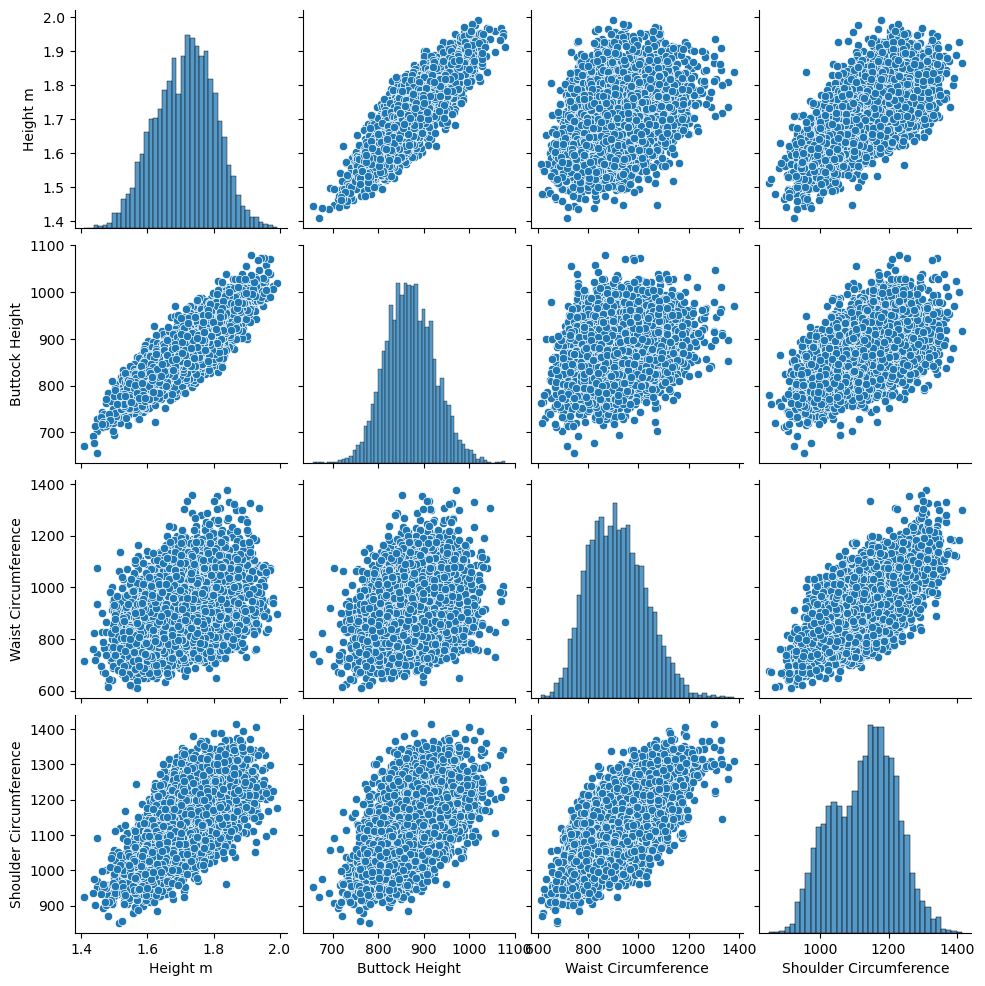

In [6]:
# Create a pairplot to inspect ansur_df
sns.pairplot(ansur_df)

plt.show()

### Instructions 2/4
-    Create the scaler and standardize the data.

In [7]:
from sklearn.preprocessing import StandardScaler

# Create the scaler and standardize the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

### Instructions 3/4
-    Create the PCA() instance and fit and transform the standardized data.

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create the scaler and standardize the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(ansur_std)

# This changes the numpy array output back to a DataFrame
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])

### Instructions 4/4
-    Create a pairplot of the principal component DataFrame.

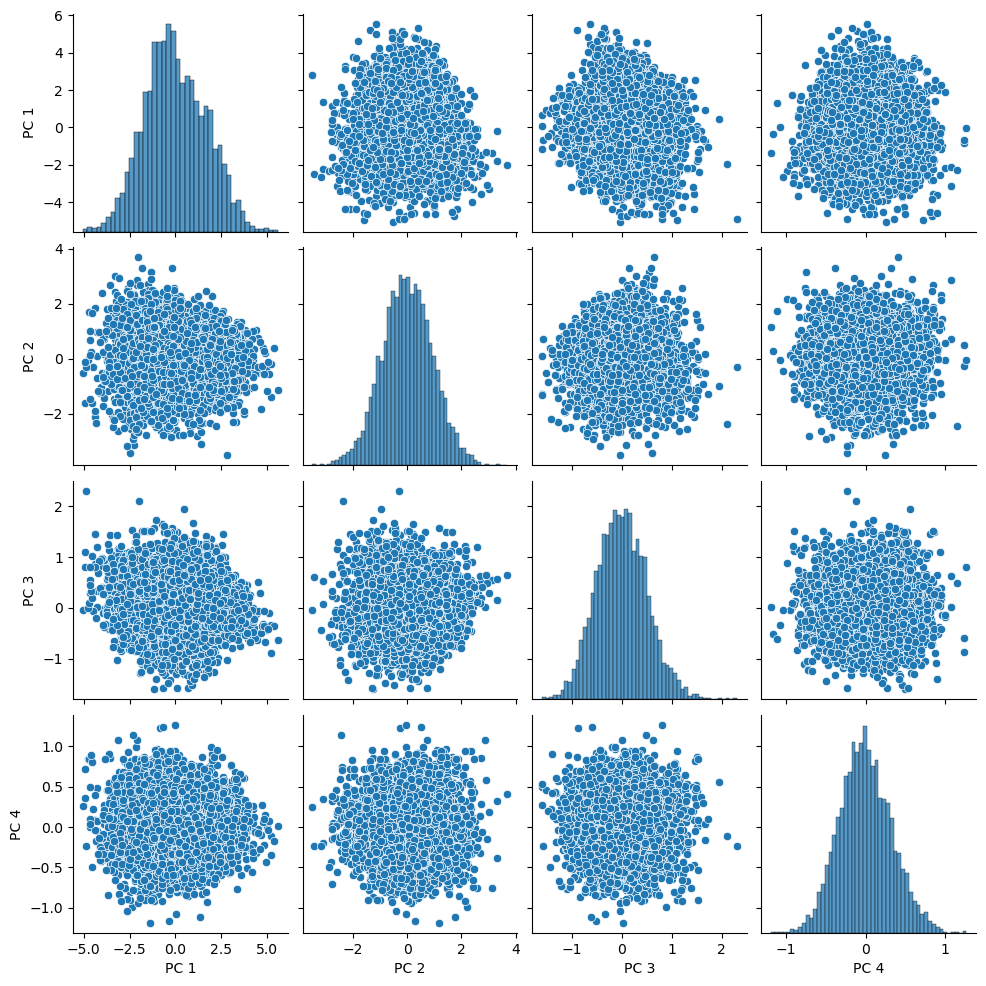

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create the scaler
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(ansur_std)
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])

# Create a pairplot of the principal component DataFrame
sns.pairplot(pc_df)
plt.show()

## PCA on a larger dataset

### You'll now apply PCA on a somewhat larger ANSUR datasample with 13 dimensions, once again pre-loaded as ansur_df. The fitted model will be used in the next exercise. Since we are not using the principal components themselves there is no need to transform the data, instead, it is sufficient to fit pca to the data.

### Instructions
-    Create the scaler.
-    Standardize the data.
-    Create the PCA() instance.
-    Fit it to the standardized data.

In [10]:
ansur_df = ansur[['stature_m', 'buttockheight', 'waistdepth', 'span', 'waistcircumference', 
                  'shouldercircumference', 'footlength', 'handlength', 'functionalleglength', 
                  'chestheight', 'chestcircumference', 'cervicaleheight', 'sittingheight']].copy()

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Apply PCA
pca = PCA()
pca.fit(ansur_std)

PCA()

## PCA explained variance

### You'll be inspecting the variance explained by the different principal components of the pca instance you created in the previous exercise.

### Instructions 1/4
-    Print the explained variance ratio per principal component.

In [12]:
# Inspect the explained variance ratio per component
print(pca.explained_variance_ratio_)

[6.96695776e-01 1.65318195e-01 4.41759304e-02 3.10140882e-02
 1.96244729e-02 1.05810800e-02 1.00183486e-02 7.58854596e-03
 5.29894105e-03 4.64328943e-03 2.69987761e-03 1.87568473e-03
 4.65770148e-04]


### Instructions 3/4
-    Calculate the cumulative sum of the explained variance ratio using a method of pca.explained_variance_ratio_.

In [13]:
# Print the cumulative sum of the explained variance ratio
print(pca.explained_variance_ratio_.cumsum())

[0.69669578 0.86201397 0.9061899  0.93720399 0.95682846 0.96740954
 0.97742789 0.98501644 0.99031538 0.99495867 0.99765855 0.99953423
 1.        ]


## Understanding the components

### You'll apply PCA to the numeric features of the Pokemon dataset, poke_df, using a pipeline to combine the feature scaling and PCA in one go. You'll then interpret the meanings of the first two components.

### All relevant packages and classes have been pre-loaded for you (Pipeline(), StandardScaler(), PCA()).

### Instructions 1/4
-    Build the pipeline with the scaler and PCA, set the number of components to calculate to 2.

In [14]:
from sklearn.pipeline import Pipeline

In [15]:
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

### Instructions 2/4
-    Fit the pipeline to the poke_df dataset and extract the component vectors.

In [16]:
poke_df = pokemon_df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].copy()

In [17]:
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit it to the dataset and extract the component vectors
pipe.fit(poke_df)
vectors = pipe['reducer'].components_.round(2)

# Print feature effects
print('PC 1 effects = ' + str(dict(zip(poke_df.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(poke_df.columns, vectors[1]))))

PC 1 effects = {'HP': 0.39, 'Attack': 0.44, 'Defense': 0.36, 'Sp. Atk': 0.46, 'Sp. Def': 0.45, 'Speed': 0.34}
PC 2 effects = {'HP': 0.08, 'Attack': -0.01, 'Defense': 0.63, 'Sp. Atk': -0.31, 'Sp. Def': 0.24, 'Speed': -0.67}


## PCA for feature exploration

### You'll use the PCA pipeline you've built in the previous exercise to visually explore how some categorical features relate to the variance in poke_df. These categorical features (Type & Legendary) can be found in a separate DataFrame poke_cat_df.

### All relevant packages and classes have been pre-loaded for you (Pipeline(), StandardScaler(), PCA())

### Instructions 1/4
-    Fit and transform the pipeline to poke_df to extract the principal components.

In [18]:
poke_cat_df = pokemon_df[['Type 1', 'Legendary']].copy()
poke_cat_df["Type"] = poke_cat_df["Type 1"]
poke_cat_df = poke_cat_df.drop(["Type 1"], axis=1)

In [19]:
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

print(pc)

[[-1.5563747  -0.02148212]
 [-0.36286656 -0.05026854]
 [ 1.28015158 -0.06272022]
 ...
 [ 2.45821626 -0.51588158]
 [ 3.5303971  -0.95106516]
 [ 2.23378629  0.53762985]]


### Instructions 2/4
-    Add the 2 components to poke_cat_df.

In [20]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

# Add the 2 components to poke_cat_df
poke_cat_df['PC 1'] = pc[:, 0]
poke_cat_df['PC 2'] = pc[:, 1]

print(poke_cat_df.head())

   Legendary   Type      PC 1      PC 2
0      False  Grass -1.556375 -0.021482
1      False  Grass -0.362867 -0.050269
2      False  Grass  1.280152 -0.062720
3      False  Grass  2.620916  0.704263
4      False   Fire -1.758284 -0.706179


### Instructions 3/4
-    Use the Type feature to color the PC 1 versus PC 2 scatterplot.

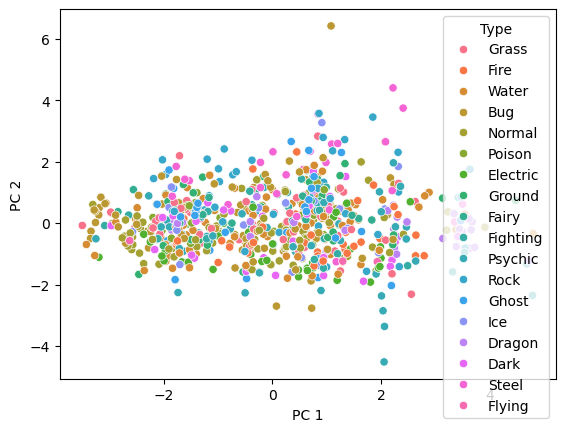

In [21]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

# Add the 2 components to poke_cat_df
poke_cat_df['PC 1'] = pc[:, 0]
poke_cat_df['PC 2'] = pc[:, 1]

# Use the Type feature to color the PC 1 vs. PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Type')
plt.show()

### Instructions 4/4
-    Use the Legendary feature to color the PC 1 versus PC 2 scatterplot.

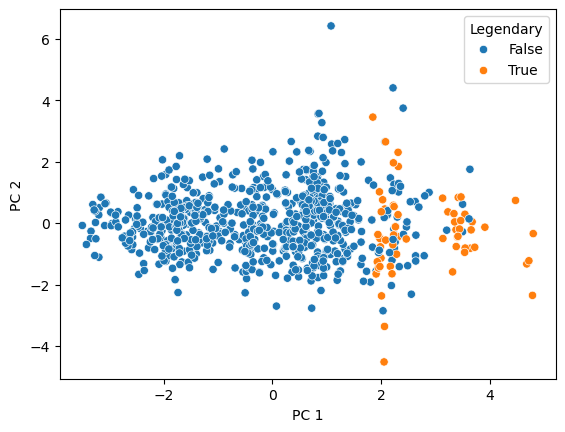

In [22]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

# Add the 2 components to poke_cat_df
poke_cat_df['PC 1'] = pc[:, 0]
poke_cat_df['PC 2'] = pc[:, 1]

# Use the Legendary feature to color the PC 1 vs. PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Legendary')
plt.show()

## PCA in a model pipeline

### We just saw that legendary Pokemon tend to have higher stats overall. Let's see if we can add a classifier to our pipeline that detects legendary versus non-legendary Pokemon based on the principal components.

### The data has been pre-loaded for you and split into training and tests datasets: X_train, X_test, y_train, y_test.

### Same goes for all relevant packages and classes(Pipeline(), StandardScaler(), PCA(), RandomForestClassifier()).

### Instructions 1/4
-    Add a scaler, PCA limited to 2 components, and random forest classifier with random_state=0 to the pipeline.

In [23]:
poke_df = pokemon_df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].copy()

poke_cat_df = pokemon_df[['Legendary']].copy()

X = poke_df
y = poke_cat_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [24]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=2)),
        ('classifier', RandomForestClassifier(random_state=0))])

### Instructions 2/4
-    Fit the pipeline to the training data.

In [25]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=2)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Prints the explained variance ratio
print(pipe['reducer'].explained_variance_ratio_)

[0.46337833 0.18266838]


/opt/conda/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


### Instructions 3/4
-    Score the model accuracy on the test set.

In [26]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=2)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the model accuracy
print(f'{accuracy:.1%} test set accuracy')

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


93.5% test set accuracy


### Instructions 4/4
-    Repeat the process with 3 extracted components.

In [27]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=3)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the explained variance ratio and accuracy
print(pipe['reducer'].explained_variance_ratio_)
print(f'{accuracy:.1%} test set accuracy')

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[0.46337833 0.18266838 0.12796357]
94.5% test set accuracy


## Selecting the proportion of variance to keep

### You'll let PCA determine the number of components to calculate based on an explained variance threshold that you decide.

### You'll work on the numeric ANSUR female dataset pre-loaded as ansur_df.

### All relevant packages and classes have been pre-loaded too (Pipeline(), StandardScaler(), PCA()).

### Instructions 1/4
-    Pipe a scaler to PCA selecting 80% of the variance.

In [28]:
ansur_df = ansur[['abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference',
       'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight',
       'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal',
       'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength',
       'headbreadth', 'headcircumference', 'headlength', 'heelanklecircumference', 'heelbreadth', 'hipbreadth', 'hipbreadthsitting', 'iliocristaleheight', 'interpupillarybreadth', 'interscyei',
       'interscyeii', 'kneeheightmidpatella', 'kneeheightsitting', 'lateralfemoralepicondyleheight', 'lateralmalleolusheight', 'lowerthighcircumference', 'mentonsellionlength', 'neckcircumference',
       'neckcircumferencebase', 'overheadfingertipreachsitting', 'palmlength', 'poplitealheight', 'radialestylionlength', 'shouldercircumference', 'shoulderelbowlength', 'shoulderlength',
       'sittingheight', 'sleevelengthspinewrist', 'sleeveoutseam', 'span', 'suprasternaleheight', 'tenthribheight', 'thighcircumference', 'thighclearance', 'thumbtipreach', 'tibialheight',
       'tragiontopofhead', 'trochanterionheight', 'verticaltrunkcircumferenceusa', 'waistbacklength', 'waistbreadth', 'waistcircumference', 'waistdepth', 'waistfrontlengthsitting',
       'waistheightomphalion', 'wristcircumference', 'wristheight', 'weight_kg', 'stature_m', 'BMI']].copy()

In [29]:
# Pipe a scaler to PCA selecting 80% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=.8))])

### Instructions 2/4
-    Fit the pipe to the data.

In [30]:
# Pipe a scaler to PCA selecting 80% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=0.8))])

# Fit the pipe to the data
pipe.fit(ansur_df)

print(f'{len(pipe["reducer"].components_)} components selected')

6 components selected


### Instructions 3/4
-    Increase the proportion of variance to keep to 90%.

In [31]:
# Let PCA select 90% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=0.9))])

# Fit the pipe to the data
pipe.fit(ansur_df)

print(f'{len(pipe["reducer"].components_)} components selected')

17 components selected


## Choosing the number of components

### You'll now make a more informed decision on the number of principal components to reduce your data to using the "elbow in the plot" technique. One last time, you'll work on the numeric ANSUR female dataset pre-loaded as ansur_df.

### All relevant packages and classes have been pre-loaded for you (Pipeline(), StandardScaler(), PCA()).

### Instructions 1/4
-    Create a pipeline with a scaler and PCA selecting 10 components.

In [32]:
# Pipeline a scaler and PCA selecting 10 components
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=10))])

### Instructions 2/4
-    Fit the pipe to the data.

In [33]:
# Pipeline a scaler and pca selecting 10 components
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=10))])

# Fit the pipe to the data
pipe.fit(ansur_df)

Pipeline(steps=[('scaler', StandardScaler()),
                ('reducer', PCA(n_components=10))])

### Instructions 3/4
-    Plot the explained variance ratio.

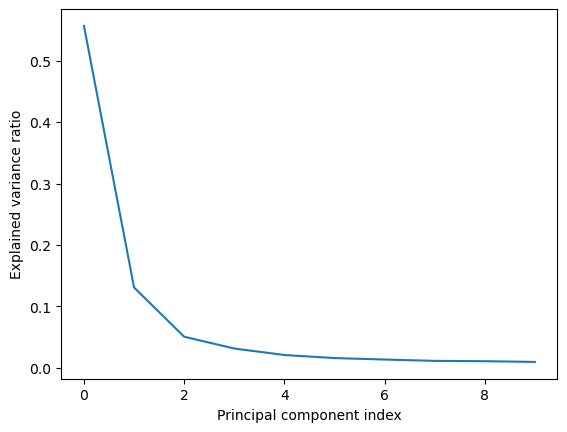

In [34]:
# Pipeline a scaler and pca selecting 10 components
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=10))])

# Fit the pipe to the data
pipe.fit(ansur_df)

# Plot the explained variance ratio
plt.plot(pipe['reducer'].explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

## PCA for image compression

### You'll reduce the size of 16 images with hand written digits (MNIST dataset) using PCA.

### The samples are 28 by 28 pixel gray scale images that have been flattened to arrays with 784 elements each (28 x 28 = 784) and added to the 2D numpy array X_test. Each of the 784 pixels has a value between 0 and 255 and can be regarded as a feature.

### A pipeline with a scaler and PCA model to select 78 components has been pre-loaded for you as pipe. This pipeline has already been fitted to the entire MNIST dataset except for the 16 samples in X_test.

### Finally, a function plot_digits has been created for you that will plot 16 images in a grid.

### Instructions 1/4
-    Plot the MNIST sample data.

In [35]:
# Plot the MNIST sample data
plot_digits(X_test)

NameError: name 'plot_digits' is not defined

### Instructions 2/4
-    Transform the input data to principal components using the pipeline.

In [36]:
# Transform the input data to principal components
pc = pipe.transform(X_test)

# Prints the number of features per dataset
print(f"X_test has {X_test.shape[1]} features")
print(f"pc has {pc.shape[1]} features")

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Attack
- Defense
- HP
- Sp. Atk
- Sp. Def
- ...
Feature names seen at fit time, yet now missing:
- BMI
- abdominalextensiondepthsitting
- acromialheight
- acromionradialelength
- anklecircumference
- ...


### Instructions 3/4
-    Inverse transform the components back to the original feature space.

In [37]:
# Transform the input data to principal components
pc = pipe.transform(X_test)

# Inverse transform the components to original feature space
X_rebuilt = pipe.inverse_transform(pc)

# Prints the number of features
print(f"X_rebuilt has {X_rebuilt.shape[1]} features")

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Attack
- Defense
- HP
- Sp. Atk
- Sp. Def
- ...
Feature names seen at fit time, yet now missing:
- BMI
- abdominalextensiondepthsitting
- acromialheight
- acromionradialelength
- anklecircumference
- ...


### Instructions 4/4
-    Plot the reconstructed data.

In [38]:
# Transform the input data to principal components
pc = pipe.transform(X_test)

# Inverse transform the components to original feature space
X_rebuilt = pipe.inverse_transform(pc)

# Plot the reconstructed data
plot_digits(X_rebuilt)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Attack
- Defense
- HP
- Sp. Atk
- Sp. Def
- ...
Feature names seen at fit time, yet now missing:
- BMI
- abdominalextensiondepthsitting
- acromialheight
- acromionradialelength
- anklecircumference
- ...
